<h3>Basic Regression Neural Network based on data and lessons from Kaggle's <a href="https://www.kaggle.com/learn/intro-to-deep-learning"> introduction to Deep Learning course </a>. </h3>
<p>The purpose of this notebook is to become familiar with the basics of setting up, compling, and fitting a model using a set of training data and validation data derived from the same data set.</p>

In [2]:
import pandas as pd
from IPython.display import display # allows the notebook to print pandas DataFrames as tables

red_wine = pd.read_csv('data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [3]:
from tensorflow import keras
from keras import layers

# three layer network
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

compile the model - using the built-in 'adam' optimizer and mean absolute error loss function

In [5]:
model.compile(
    optimizer='adam',
    loss='mae',
)

training - 256 batch size and 10 epochs

In [6]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 51ms/step - loss: 0.2853 - val_loss: 0.1359
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.1430 - val_loss: 0.1410
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1331 - val_loss: 0.1303
Epoch 4/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1206 - val_loss: 0.1287
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 0.1149 - val_loss: 0.1102
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1119 - val_loss: 0.1159
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1101 - val_loss: 0.1031
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1059 - val_loss: 0.1099
Epoch 9/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1053 - val_loss: 0.1019
Epoch 10/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1026 - val_loss: 0.1063


<AxesSubplot:>

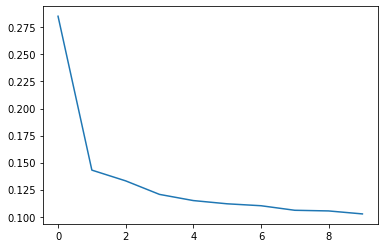

In [7]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()

loss curve turning horizontal means the model has learned what it can and no additional epochs are needed. for larger datasets with more complicated networks, more epochs would be needed